# Aerial image semantic segmentation using drone image dataset

In [1]:
# making all the imports
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import sys

# Importing custom defined functions
from plotting_utilities import *
from preprocess import *

In [2]:
# Collecting all the images
# Collect all the file names to be imported
ipath = '..\data\dataset\semantic_drone_dataset\original_images'
all_file_names = file_name_collector(ipath)

# Split the file names to train and split
train_list, test_list = file_names_to_import(all_file_names)

# Import the train and test images
train_image = dataset_import(train_list, path = ipath)
print('\n completed importing train images')
test_image = dataset_import(test_list, path = ipath)
print('\n completed importing test images')

File read: 320
 completed importing train images
File read: 80
 completed importing test images


In [3]:
# Collecting all the images
# Collect all the file names to be imported
mpath = 'D:\Machine learning\projects\Aerial image segmentation\data\RGB_color_image_masks\RGB_color_image_masks'
all_file_names = file_name_collector(mpath)

# Split the file names to train and split
mask_train_list, mask_test_list = file_names_to_import(all_file_names)

# Import the train and test images
train_mask = dataset_import(mask_train_list, path = mpath)
print('\n completed importing train masks')
test_mask = dataset_import(mask_test_list, path = mpath)
print('\n completed importing test masks')

File read: 320
 completed importing train masks
File read: 80
 completed importing test masks


In [4]:
# Currently we have :
# Train image, Train mask
# Test image, Test mask

#preprocess the images and masks
training_dataset = create_dataset(train_image, train_mask)
#test_image, test_mask = process_image_and_mask(test_image, test_mask)

In [5]:
testing_dataset = create_dataset(test_image, test_mask)

In [6]:
# Verifying all shapes

print(f'Image train set size is: ', training_dataset)


Image train set size is:  <PrefetchDataset shapes: ((None, 150, 150, 3), (None, 150, 150, 3)), types: (tf.float32, tf.float32)>


(150, 150, 3)


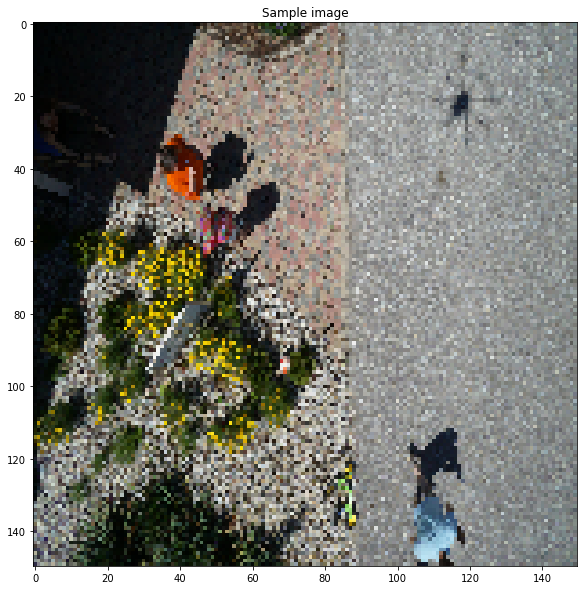

In [7]:
#Print a sample image

for element in training_dataset:
    image = element[0][1]
    plot_single_image(image)
    print(image.shape)
    break

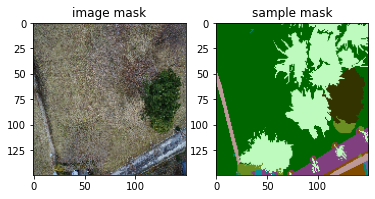

In [8]:
# Plotting an image and it's corresponing mask

for item in training_dataset:
    img = item[0][0]
    mask = item[1][0]
    plot_sample_image_mask(img, mask)
    break



## Architecturing the U-Net model